In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data_copy = train_data
train_data_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data_copy.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
display(train_data_copy[train_data_copy['Embarked'].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
highest_embarked = train_data_copy['Embarked'].value_counts().idxmax()
train_data_copy['Embarked'].fillna(highest_embarked, inplace=True)

train_data_copy['Embarked'] = train_data_copy['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

groups = [['Pclass', 'Sex', 'Parch', 'SibSp'], ['Pclass', 'Sex', 'Parch'], ['Pclass', 'Sex']]
for group in groups:
    train_data_copy['Age'] = train_data_copy.groupby(group)['Age'].transform(lambda x: x.fillna(x.mean()))
train_data_copy['Age'] = train_data_copy['Age'].fillna(train_data_copy['Age'].mean())
train_data_copy['Cabin'].fillna('U', inplace=True)

train_data_copy['Title'] = train_data_copy['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_data_copy['Title'] = train_data_copy['Title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data_copy['Title'] = train_data_copy['Title'].replace(['Mlle', 'Ms'], 'Miss').replace('Mme', 'Mrs')
train_data_copy['Title'] = train_data_copy['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})

train_data_copy['FamilySize'] = train_data_copy['SibSp'] + train_data_copy['Parch'] + 1

train_data_copy['Alone'] = (train_data_copy['FamilySize'] == 1).astype(int)

train_data_copy['Child'] = (train_data_copy['Age'] < 18).astype(int)

train_data_copy['Cabin'] = train_data_copy['Cabin'].str[:1]

cabin_mapping = {cabin: i for i, cabin in enumerate(set(train_data_copy['Cabin']))}

train_data_copy['Cabin'] = train_data_copy['Cabin'].map(cabin_mapping)

train_data_copy['TicketSurvivor'] = 0

ticket_counts = train_data_copy['Ticket'].value_counts().to_dict()

for ticket, count in ticket_counts.items():
    if count > 1:
        survivors = train_data_copy['Survived'][train_data_copy['Ticket'] == ticket].sum()
        if survivors > 0:
            train_data_copy.loc[train_data_copy['Ticket'] == ticket, 'TicketSurvivor'] = 1

train_data_copy = train_data_copy.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

train_data_copy['Sex'] = train_data_copy['Sex'].map({'male': 0, 'female': 1})


train_data_copy.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Alone,Child,TicketSurvivor
0,0,3,0,22.000000,1,0,7.2500,7,0,1,2,0,0,0
1,1,1,1,38.000000,1,0,71.2833,8,1,3,2,0,0,0
2,1,3,1,26.000000,0,0,7.9250,7,0,2,1,1,0,0
3,1,1,1,35.000000,1,0,53.1000,8,0,3,2,0,0,1
4,0,3,0,35.000000,0,0,8.0500,7,0,1,1,1,0,0
5,0,3,0,29.184492,0,0,8.4583,7,2,1,1,1,0,0
6,0,1,0,54.000000,0,0,51.8625,6,0,1,1,1,0,0
7,0,3,0,2.000000,3,1,21.0750,7,0,4,5,0,1,0
8,1,3,1,27.000000,0,2,11.1333,7,0,3,3,0,0,1
9,1,2,1,14.000000,1,0,30.0708,7,1,3,2,0,1,1


In [9]:
train_df = train_data_copy.copy()
X = train_df.drop(['Survived'], axis = 1)
Y = train_df['Survived']

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Alone,Child,TicketSurvivor
445,-1.566107,-0.737695,-1.889289,-0.474545,2.008933,0.999770,-2.824993,-0.568837,2.206598,0.679295,-1.231645,2.464027,-0.596795
650,0.827377,-0.737695,-0.025740,-0.474545,-0.473674,-0.489442,0.343788,-0.568837,-0.707550,-0.560975,0.811922,-0.405840,-0.596795
172,0.827377,1.355574,-2.111276,0.432793,0.767630,-0.424256,0.343788,-0.568837,0.263832,0.679295,-1.231645,2.464027,1.675617
450,-0.369365,-0.737695,0.478579,0.432793,2.008933,-0.089684,0.343788,-0.568837,-0.707550,1.299429,-1.231645,-0.405840,1.675617
314,-0.369365,-0.737695,0.996550,0.432793,0.767630,-0.119886,0.343788,-0.568837,-0.707550,0.679295,-1.231645,-0.405840,1.675617


Ensemble Voting Classifier Accuracy: 0.8470149253731343


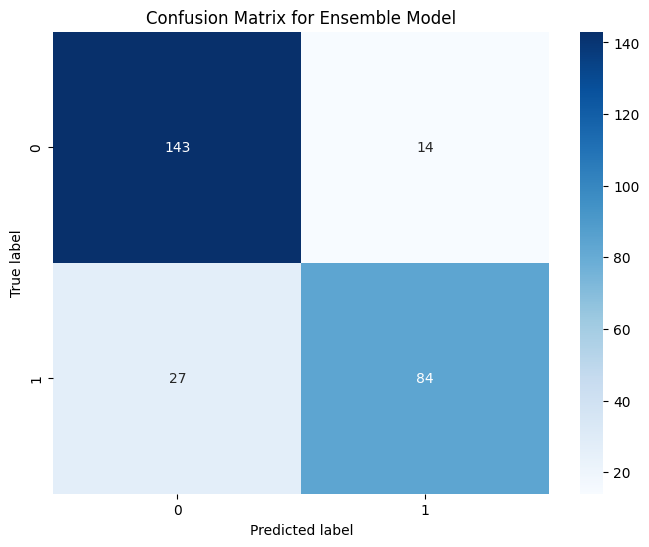

In [10]:
import warnings
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore warnings
warnings.filterwarnings("ignore")

# Assuming X_train, X_test, Y_train, Y_test are already defined

# Define individual models
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)



# Ensemble with Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('gb', gb_model)
], voting='soft')

voting_clf.fit(X_train, Y_train)

# Generate final prediction from the ensemble model
ensemble_prediction = voting_clf.predict(X_test)

# Evaluate accuracy of the ensemble model
ensemble_accuracy = accuracy_score(Y_test, ensemble_prediction)
print(f"Ensemble Voting Classifier Accuracy: {ensemble_accuracy}")

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, ensemble_prediction)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



In [11]:
entire_dataset_predictions = voting_clf.predict(X)

# Create a DataFrame with passenger IDs and predictions for the entire dataset
passenger_ids_entire = train_data['PassengerId']
predictions_entire_df = pd.DataFrame({'PassengerId': passenger_ids_entire, 'Survived': entire_dataset_predictions})

# Display the DataFrame
print(predictions_entire_df)


     PassengerId  Survived
0              1         0
1              2         1
2              3         1
3              4         1
4              5         0
..           ...       ...
886          887         0
887          888         1
888          889         0
889          890         0
890          891         0

[891 rows x 2 columns]
